# Museus
#### Projeto Final: Análise Exploratória de Dados



# **Dataset**

> Contém uma lista de museus e organizações relacionadas nos Estados Unidos. As informações incluidas são:
- Nome;
- Tipo do Museu;
- Nome da Instituição;
- Localização (Rua, Cidade, Zipcode, Longitude);
- Renda e Receita.
>
> *Fonte: https://www.kaggle.com/datasets/imls/museum-directory*

# **1. Importação das bibliotecas e carregamento dos dados**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns

# Importando o Dataset
df = pd.read_csv('/content/museums.csv', low_memory = False)

# **2. Informações básicas sobre o dataset**

Após uma renderização rápida, utilizamos o *.describe()* e *.info()* para obter um resumo da estrutura dos dados.

In [ ]:
df.head() ## visualização das primeiras linhas do datasetdados.head()

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


In [ ]:
df[['Income', 'Revenue']].describe() ## dados estatísticos sobre as colunas que apresentam valores

,Income,Revenue
count,2.296100e+04,2.229000e+04
mean,1.069682e+08,2.097605e+07
std,2.509287e+09,2.485197e+08
min,-9.230000e+02,-2.127393e+06
25%,0.000000e+00,0.000000e+00
50%,8.781000e+03,3.307000e+03
75%,2.163770e+05,1.676960e+05
max,8.318144e+10,5.840349e+09


In [ ]:
df.info() ## informações básicas sobre as colunas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33072 entries, 0 to 33071
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Museum ID                                 33072 non-null  int64  
 1   Museum Name                               33072 non-null  object 
 2   Legal Name                                33072 non-null  object 
 3   Alternate Name                            1927 non-null   object 
 4   Museum Type                               33072 non-null  object 
 5   Institution Name                          2749 non-null   object 
 6   Street Address (Administrative Location)  33062 non-null  object 
 7   City (Administrative Location)            33072 non-null  object 
 8   State (Administrative Location)           33072 non-null  object 
 9   Zip Code (Administrative Location)        33072 non-null  object 
 10  Street Address (Physical Location)

In [ ]:
df.isnull().sum() ## contagem de valores nulos por coluna do dataset

Museum ID                                       0
Museum Name                                     0
Legal Name                                      0
Alternate Name                              31145
Museum Type                                     0
Institution Name                            30323
Street Address (Administrative Location)       10
City (Administrative Location)                  0
State (Administrative Location)                 0
Zip Code (Administrative Location)              0
Street Address (Physical Location)          23856
City (Physical Location)                    23849
State (Physical Location)                   23849
Zip Code (Physical Location)                23851
Phone Number                                10140
Latitude                                       65
Longitude                                      65
Locale Code (NCES)                             77
County Code (FIPS)                           2536
State Code (FIPS)                               1


A partir das observações feitas acima, é possível verificar que determinadas colunas estão preenchidas integralmente - como *Museum ID* e *Museum Name* - que totalizam 33072 linhas cada.
No entanto, colunas que apresentam dados alternativos, como nomes institucionais e localizações físicas, parecem concentrar as omissões de dados mais críticas.

Nota-se que os dados referentes à coluna *Tax Period* estavam fora da formatação esperada (date/string) e julga-se necessária a conversão do tipo float para datetime.

In [ ]:
df['Tax Period - Date'] = pd.to_datetime(df['Tax Period'], format = '%Y%m') ## criação de nova coluna para alteração do tipo

df

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0,2013-12-01
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0,2013-12-01
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0,2013-12-01
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0,2014-12-01
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0,2013-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,8405600184,WYOMING STATE HISTORICAL SOCIETY,WYOMING STATE HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,PO BOX 73,SHERIDAN,WY,82801,...,-106.87592,4.0,33.0,56.0,5,836007540,NaN,NaN,NaN,NaT
33068,8405600061,WYOMING STATE MUSEUM,WYOMING STATE MUSEUM VOLUNTEERS INC,NaN,GENERAL MUSEUM,NaN,2301 CENTRAL AVENUE,CHEYENNE,WY,82001,...,-104.81813,1.0,21.0,56.0,5,237368629,201404.0,0.0,0.0,2014-04-01
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,NaN,HISTORIC PRESERVATION,NaN,1273 N 15TH ST STE 121,LARAMIE,WY,82072,...,-105.57686,3.0,1.0,56.0,5,830318392,201312.0,208508.0,83981.0,2013-12-01
33070,8405600137,WYOMING TRANSPORTATION MUSEUM,WYOMING TRANSPORTATION MUSEUM CORP,NaN,HISTORY MUSEUM,NaN,PO BOX 704,CHEYENNE,WY,82003,...,-104.81916,1.0,21.0,56.0,5,830295570,201309.0,0.0,0.0,2013-09-01


# **3. Insights básicos sobre os dados**
A seguir, algumas questões norteadoras ``QN`` conduziram uma análise exploratória do dataset.


### ``QN-01`` ``Todos os IDs representam entradas únicas no dataset?``

Uma proposta de análise possível é comparar a quantidade de valores únicos na coluna Museum ID com a quantidade de valores únicos na coluna Museum Name, que é uma coluna sem valores nulos.

In [ ]:
print("Quantidade valores únicos em 'Museum ID':", len(df['Museum ID'].unique()))
print("Quantidade valores únicos em 'Museum Name':", len(df['Museum Name'].unique()))
print("Diferença:", len(df['Museum ID'].unique()) - len(df['Museum Name'].unique()))

Quantidade valores únicos em 'Museum ID': 33072
Quantidade valores únicos em 'Museum Name': 31546
Diferença: 1526


Já que, a rigor, museus diferentes podem ter o mesmo, será possível diferenciar as ocorrências? Uma saída proposta ao problema é agrupar museus por endereço (rua), contando as ocorrências, e investigar uma das entradas:

In [ ]:
df.groupby('Museum Name')["Street Address (Administrative Location)"].value_counts().sort_values(ascending=False) ## retorna museus registrados mais de uma vez, em ordem descrescente de quantidade

Museum Name                                 Street Address (Administrative Location)
ALBION VALLEY HISTORICAL SOCIETY            PO BOX 532                                  2
MADISON COUNTY HISTORICAL SOCIETY           435 MAIN ST                                 2
PANHANDLE-PLAINS HISTORICAL MUSEUM          2503 4TH AVE                                2
GOLETA VALLEY HISTORICAL SOCIETY            304 N LOS CARNEROS RD                       2
MUSEUM OF CONTEMPORARY PHOTOGRAPHY          600 SOUTH MICHIGAN AVENUE                   2
                                                                                       ..
GRACIE MANSION CONSERVANCY                  88TH STREET AT EAST END AVE                 1
GRACIE JIU-JITSU MUSEUM                     3515 ARTESIA BLVD                           1
GRACEVILLE HISTORICAL SOCIETY               PO BOX 322                                  1
GRACE MUSEUM                                PO BOX 33                                   1
ZYDECO HISTORIC

In [ ]:
["Museum Name"]==["MUSEUM OF CONTEMPORARY PHOTOGRAPHY"]

False

In [ ]:
dados[dados["Museum Name"]=="MUSEUM OF CONTEMPORARY PHOTOGRAPHY"]

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
9289,8409503762,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,COLUMBIA COLLEGE,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,ART MUSEUM,COLUMBIA COLLEGE CHICAGO,600 SOUTH MICHIGAN AVENUE,CHICAGO,IL,60605,...,31.0,17.0,4,366112087,201308.0,263041160.0,256922328.0,2013-08-01,-6118832.0,False
9290,8401700095,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,NaN,GENERAL MUSEUM,NaN,600 SOUTH MICHIGAN AVENUE,CHICAGO,IL,60605,...,31.0,17.0,4,NaN,NaN,NaN,NaN,NaT,NaN,False


> Já que, na ausência de dados complementares, não é possível determinar a causa dos registros duplicados *(tentativas de correção no cadastro? tipos diferentes de museu unidos num só espaço físico? etc)*, propõe-se: 
>
> [1] a criação de um novo dataset com os dados duplicados, para estudos futuros; 
> 
> [2] a atualização do dataset utilizado, com a retirada dos valores em questão, para evitar o comprometimento das análises posteriores.

In [ ]:
df_duplicados = df[df.duplicated("Museum Name")]
df_duplicados.head()


,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date
270,8409502904,CALHOUN FINE ARTS GALLERY,CALHOUN FINE ARTS GALLERY,NaN,ART MUSEUM,JOHN C CALHOUN STATE COMMUNITY COLLEGE,102 WYNN DR NW,HUNTSVILLE,AL,35805,...,-86.65576,1.0,89.0,1.0,3,630505871,NaN,NaN,NaN,NaT
456,8400100425,MARENGO COUNTY HISTORICAL SOCIETY,ELIZABETH LAIRD TR UW 101993 FBO MARENGO COUNT...,NaN,HISTORIC PRESERVATION,NaN,PO BOX 490,DEMOPOLIS,AL,36732,...,-87.84868,4.0,91.0,1.0,3,636187139,201312.0,570352.0,94581.0,2013-12-01
656,8409502735,ART GALLERY,JOHN BROWN UNIVERSITY,NaN,ART MUSEUM,JOHN BROWN UNIVERSITY,2000 WEST UNIVERSITY STREET,SILOAM SPRINGS,AR,72761,...,-94.56199,3.0,7.0,5.0,3,710239576,201406.0,90059515.0,73739473.0,2014-06-01
657,8409502755,ART GALLERY,ART GALLERY,NaN,ART MUSEUM,SOUTHERN ARKANSAS UNIVERSITY,100 EAST UNIVERSITY STREET,MAGNOLIA,AR,71753,...,-93.23695,4.0,27.0,5.0,3,716007749,NaN,NaN,NaN,NaT
735,8409503168,FINE ARTS CENTER GALLERY,FINE ARTS CENTER GALLERY,NaN,ART MUSEUM,ARKANSAS STATE UNIVERSITY,PO BOX 600,STATE UNIVERSITY,AR,72467,...,-90.67934,4.0,31.0,5.0,3,716000556,NaN,NaN,NaN,NaT


In [ ]:
 df = df[~df.duplicated("Museum Name")] ## atribui a df uma nova versão de "Museum Name" sem valores duplicados

``QN-02`` ``Qual o ranking da quantidade de museus por Zip Code? Alguém se destaca?``

In [ ]:
df['Zip Code (Physical Location)'].value_counts().head(5)

74743.0    50
92101.0     8
77550.0     8
87504.0     7
1103.0      7
Name: Zip Code (Physical Location), dtype: int64

No Zipcode ``74743`` foram elencados 50 diferentes museus, listados abaixo:

In [ ]:
df[df['Zip Code (Physical Location)'] == 74743.0]

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date
23607,8404000270,APPALACHIAN CHILDREN'S MUSEUM AND LEARNING CENTER,APPALACHIAN CHILDRENS MUSEUM AND LEARNING CENT...,NaN,CHILDREN'S MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-82.51842,3.0,195.0,21.0,3,611342718,201212.0,0.0,0.0,2012-12-01
23623,8404000264,BILTMORE VILLAGE HISTORIC MUSEUM,BILTMORE VILLAGE HISTORIC MUSEUM COMMISSION INC,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-82.54306,1.0,21.0,37.0,3,561634455,201212.0,0.0,0.0,2012-12-01
23627,8404000249,BOSTON FIRE MUSEUM,BOSTON FIRE MUSEUM,BOSTON FIRE MUSEUM,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-71.04875,1.0,25.0,25.0,1,510142662,201212.0,0.0,0.0,2012-12-01
23630,8404000530,BRAZOS VALLEY MUSEUM OF NATURAL SCIENCE,BRAZOS VALLEY MUSEUM OF NATURAL SCIENCE,NaN,NATURAL HISTORY MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-96.31881,4.0,41.0,48.0,5,741765335,201212.0,0.0,0.0,2012-12-01
23637,8404000225,BUICK CLUB OF AMERICA MUSEUM AND ARCHIVE FOUND...,BUICK CLUB OF AMERICA MUSEUM AND ARCHIVE FOUND...,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-86.13514,1.0,97.0,18.0,4,383407211,201212.0,0.0,0.0,2012-12-01
23640,8404000549,CALLAHANS AUTO MUSEUM,CALLAHANS AUTO MUSEUM,CALLAHANS AUTO MUSEUM,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-107.24940,4.0,51.0,35.0,5,850423240,201212.0,0.0,0.0,2012-12-01
23656,8404000259,CHESAPEAKE FIRE MUSEUM,CHESAPEAKE FIRE MUSEUM INC,NaN,HISTORIC PRESERVATION,NaN,603 W JACKSON,HUGO,OK,74743,...,NaN,NaN,NaN,24.0,2,521713622,201212.0,0.0,0.0,2012-12-01
23665,8404000351,CHOCTAW MUSEUM,CHOCTAW MUSEUM,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-89.21031,4.0,99.0,28.0,3,731222114,201212.0,0.0,0.0,2012-12-01
23676,8404000269,CLOVERFORK MUSEUM,CLOVERFORK MUSEUM INC,NaN,HISTORY MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-83.12530,4.0,95.0,21.0,3,611300680,201212.0,0.0,0.0,2012-12-01
23679,8404000532,COLORADO CHOCOLATE MUSEUM,COLORADO CHOCOLATE MUSEUM,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,-104.86199,4.0,41.0,8.0,5,743032403,201212.0,0.0,0.0,2012-12-01


### ``QN-03`` ``Qual o ranking da quantidade de museus por Estado?`` ``A quantidade de museus bate com o somatório de receitas dos museus por Estado?``

In [ ]:
df['State (Administrative Location)'].value_counts().sort_values(ascending=False).head(5)

CA    2632
NY    2085
TX    1812
PA    1574
IL    1259
Name: State (Administrative Location), dtype: int64

É possível verificar que California ``(CA)``, New York ``(NY)`` e Texas ``(TX)`` possuem a maior quantidade de museus registrados no dataset.

Agrupando o *Income* por Estado:

In [ ]:
df.groupby('State (Administrative Location)')['Income'].sum().sort_values(ascending=False).head(5).astype('int64')

State (Administrative Location)
MA    1611013030259
CA     153000790544
PA      99834988134
NY      86502209893
AZ      83448313319
Name: Income, dtype: int64

Apesar de California ``(CA)``, New York ``(NY)`` e Texas ``(TX)`` possuirem a maior quantidade de museus registrado, o estado de *Washington DC* possui, somando, os museus com maior receita. Para uma visualização gráfica, foi plotado o gráfico abaixo:

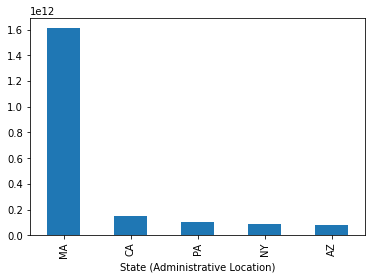

In [ ]:
df.groupby('State (Administrative Location)')['Income'].sum().sort_values(ascending=False).head(5).astype('int64').plot(kind= 'bar')

A grande diferença entre os valores do primeiro e do segundo colocados causa estranheza. Buscando compreender melhor o contexto dos dados, um novo dataframe *df_ma* é criado com os dados relativos ao estado de Massachusetts ``MA`` e os valores da coluna *Income* são ordenados do maior para o menor.

In [ ]:
df_ma = df[df['State (Administrative Location)'] == 'MA']

df_ma.sort_values('Income', ascending=False).head(20)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date
12064,8409501386,COLLECTION OF SCIENTIFIC INSTRUMENTS,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,1 OXFORD STREET,CAMBRIDGE,MA,2138,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
12148,8409501444,FISHER MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,324 NORTH MAIN STREET,PETERSHAM,MA,1366,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
12794,8409501062,WARREN ANATOMICAL MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,HARVARD UNIVERSITY,10 SHATTUCK STREET,BOSTON,MA,2115,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
12151,8409503198,FOGG ART MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,ART MUSEUM,HARVARD UNIVERSITY,32 QUINCY STREET,CAMBRIDGE,MA,2138,...,-71.11216,2.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
11989,8409501362,BUSCH-REISINGER MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,32 QUINCY STREET,CAMBRIDGE,MA,2138,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
12672,8409501782,SEMITIC MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,6 DIVINITY AVENUE,CAMBRIDGE,MA,2138,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
12021,8409503199,CENTER FOR CONSERVATION AND TECHNICAL STUDIES,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,ART MUSEUM,HARVARD UNIVERSITY,32 QUINCY STREET,CAMBRIDGE,MA,2138,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
11883,8409501948,ARNOLD ARBORETUM OF HARVARD UNIVERSITY JAMAICA...,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",HARVARD UNIVERSITY,125 ARBORWAY,CAMBRIDGE,MA,2130,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
12233,8409500510,HARVARD-SMITHSONIAN CENTER FOR ASTROPHYSICS,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,HARVARD UNIVERSITY,60 GARDEN STREET,CAMBRIDGE,MA,2138,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01
12232,8409501508,HARVARD UNIVERSITY PEABODY MUSEUM OF ARCHAEOLO...,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,11 DIVINITY AVENUE,CAMBRIDGE,MA,2138,...,-71.11216,1.0,17.0,25.0,1,42103580,201306.0,8.318144e+10,5.840349e+09,2013-06-01


É possível constatar que pelo menos 19 instituições ligadas à Universidade de Harvard, legalmente PRESIDENT AND FELLOWS OF HARVARD COLLEGE, são reportadas com o mesmo valor de Income. Cogita-se a possibilidade de que o responsável por fornecer ou o responsável por agregar os dados atribuiu o mesmo valor a todas as instituições do grupo, causando o ruído.

É seguro supor que museus pertecentes a grandes grupos, como o Smithsonian Institution, apresentem essa mesma inconsistência.

### ``QN-04`` ``Qual o ranking da quantidade de museus por Estado?`` ``A quantidade de museus bate com o somatório de receitas dos museus por Estado?``

Utilizando a função *value_counts()* e a visualização gráfica, obtém-se que a categoria "*HISTORIC PRESERVATION*" apresentou a maior quantiadede de museus.

In [ ]:
df["Museum Type"].value_counts()

HISTORIC PRESERVATION                            13772
GENERAL MUSEUM                                    8587
ART MUSEUM                                        3077
HISTORY MUSEUM                                    2263
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER     1477
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM         988
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            563
CHILDREN'S MUSEUM                                  499
NATURAL HISTORY MUSEUM                             320
Name: Museum Type, dtype: int64

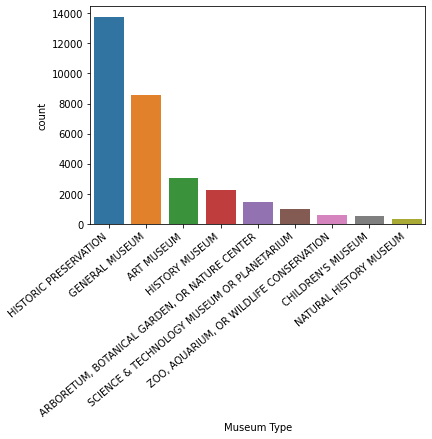

In [ ]:
grafico = sns.countplot(x = df["Museum Type"], order = df["Museum Type"].value_counts().index)

grafico.set_xticklabels(grafico.get_xticklabels(), rotation=40, ha="right")

grafico

### ``QN-05`` ``Que tipo de museu tem maior receita?`` ``É o mesmo tipo que tem maior lucro somado?``

A receita de cada tipo de museu é somada, evidenciando que museus do tipo *GENERAL MUSEUM* aprensentaram melhores resultados, embora a receita média de outros tipos de museu sejam superiores.

In [ ]:
df.groupby('Museum Type')['Income'].sum().sort_values(ascending=False).astype('int64')

Museum Type
GENERAL MUSEUM                                   764927212182
ART MUSEUM                                       577559989029
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       400531976768
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER    373037592051
NATURAL HISTORY MUSEUM                           141497653615
HISTORIC PRESERVATION                            118658615179
HISTORY MUSEUM                                    35853697306
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            1948785653
CHILDREN'S MUSEUM                                   643707694
Name: Income, dtype: int64

In [ ]:
df.groupby('Museum Type')['Income'].mean().sort_values(ascending=False).astype('int64')

Museum Type
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       976907260
NATURAL HISTORY MUSEUM                           597036513
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER    483836046
ART MUSEUM                                       312532461
GENERAL MUSEUM                                   179055995
HISTORY MUSEUM                                    17073189
HISTORIC PRESERVATION                             10272583
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            6452932
CHILDREN'S MUSEUM                                  1992903
Name: Income, dtype: int64

Utilizando as colunas de faturamento (Revenue) e receita (Income), foi feita a análise básica de lucratividade dos museus durante o período fiscal. A partir disso, foi introduzida uma nova coluna Lucrou contendo valores booleanos que avaliam se a subtração entre receita e faturamento foi positiva.

In [ ]:
df['Profit'] = df['Revenue'] - df['Income']

df['Lucrou'] = df['Profit'] > 0

df

<ipython-input-29-f6ae9e254418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = df['Revenue'] - df['Income']
<ipython-input-29-f6ae9e254418>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lucrou'] = df['Profit'] > 0


,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,20.0,2.0,6,920071852,201312.0,602912.0,550236.0,2013-12-01,-52676.0,False
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0,2013-12-01,-55834.0,False
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,122.0,2.0,6,921761906,201312.0,740030.0,729080.0,2013-12-01,-10950.0,False
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,122.0,2.0,6,920165178,201412.0,0.0,0.0,2014-12-01,0.0,False
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,20.0,2.0,6,920071852,201312.0,602912.0,550236.0,2013-12-01,-52676.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33064,8405600060,WYOMING STATE HISTORICAL SOCIETY,WYOMING STATE HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,PO BOX 29,THERMOPOLIS,WY,82443,...,17.0,56.0,5,237366337,NaN,NaN,NaN,NaT,NaN,False
33068,8405600061,WYOMING STATE MUSEUM,WYOMING STATE MUSEUM VOLUNTEERS INC,NaN,GENERAL MUSEUM,NaN,2301 CENTRAL AVENUE,CHEYENNE,WY,82001,...,21.0,56.0,5,237368629,201404.0,0.0,0.0,2014-04-01,0.0,False
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,NaN,HISTORIC PRESERVATION,NaN,1273 N 15TH ST STE 121,LARAMIE,WY,82072,...,1.0,56.0,5,830318392,201312.0,208508.0,83981.0,2013-12-01,-124527.0,False
33070,8405600137,WYOMING TRANSPORTATION MUSEUM,WYOMING TRANSPORTATION MUSEUM CORP,NaN,HISTORY MUSEUM,NaN,PO BOX 704,CHEYENNE,WY,82003,...,21.0,56.0,5,830295570,201309.0,0.0,0.0,2013-09-01,0.0,False


In [ ]:
df['Lucrou'].count()

31546

In [ ]:
df['Lucrou'].value_counts()

False    31525
True        21
Name: Lucrou, dtype: int64

In [ ]:
df[(df.Lucrou)].head(21)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
2728,8400602228,MARIN HISTORY MUSEUM,MARIN HISTORY MUSEUM,NaN,HISTORY MUSEUM,NaN,1125 B ST,SAN RAFAEL,CA,94901,...,41.0,6.0,6,941642459,201306.0,143682.0,167921.0,2013-06-01,24239.0,True
5338,8401100080,KUSH,KUSH INC,NaN,GENERAL MUSEUM,NaN,4545 42ND ST NW STE 208,WASHINGTON,DC,20016,...,1.0,11.0,2,200472248,201102.0,150269.0,786583.0,2011-02-01,636314.0,True
6712,8401200584,WORLD AIDS MUSEUM,WORLD AIDS MUSEUM INCORPORATED,NaN,GENERAL MUSEUM,NaN,616 NE 15TH STREET,FORT LAUDERDALE,FL,33304,...,11.0,12.0,3,453419591,201312.0,113388.0,129634.0,2013-12-01,16246.0,True
9747,8401701328,WRYMOO RAILROAD HISTORICAL AND EDUCATIONAL SOC...,WRYMOO RAILROAD HISTORICAL & EDUC SOCIETY MODO...,NaN,HISTORIC PRESERVATION,NaN,PO BOX 325,MARION,IL,62959,...,145.0,21.0,3,680347484,201312.0,61654.0,469228.0,2013-12-01,407574.0,True
10256,8401800650,OUR HERITAGE,OUR HERITAGE INC,NaN,HISTORIC PRESERVATION,NaN,PO BOX 335,VERNON,IN,47282,...,NaN,18.0,4,356051149,201303.0,42233.0,42335.0,2013-03-01,102.0,True
11294,8409500670,MONROE MOOSICK MEDICIAL AND SCIENCE MUSEUM,TRANSYLVANIA UNIVERSITY,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,TRANSYLVANIA UNIVERSITY,300 NORTH BROADWAY,LEXINGTON,KY,40508,...,67.0,21.0,3,610444825,201406.0,50785267.0,64763636.0,2014-06-01,13978369.0,True
11304,8409501664,MUSEUM OF EARLY PHILOSOPHICAL APPARATUS,TRANSYLVANIA UNIVERSITY,NaN,GENERAL MUSEUM,TRANSYLVANIA UNIVERSITY,300 N BROADWAY,LEXINGTON,KY,40508,...,67.0,21.0,3,610444825,201406.0,50785267.0,64763636.0,2014-06-01,13978369.0,True
12043,8402500596,CHILDREN'S GLOBAL DISCOVERY MUSEUM,CHILDRENS GLOBAL DISCOVERY MUSEUM,NaN,CHILDREN'S MUSEUM,NaN,100 SOHIER ST,COHASSET,MA,2025,...,21.0,25.0,1,43583526,201312.0,116837.0,116863.0,2013-12-01,26.0,True
13287,8402400042,NATIONAL CHILDREN'S MUSEUM,NATIONAL CHILDREN'S MUSEUM,NaN,CHILDREN'S MUSEUM,NaN,151 ST GEORGE BOULEVARD,NATIONAL HARBOR,MD,20745,...,33.0,24.0,2,237423491,201306.0,1981941.0,2910829.0,2013-06-01,928888.0,True
14372,8402600269,GREEKTOWN PRESERVATION SOCIETY,GREEKTOWN PRESERVATION SOCIETY,NaN,HISTORIC PRESERVATION,NaN,547 MONROE ST,DETROIT,MI,48226,...,163.0,26.0,4,203221715,201312.0,88237.0,92652.0,2013-12-01,4415.0,True


De 31546 entradas válidas na coluna Lucrou, apenas 21 museus apresentaram resultado positivo. Constata-se, a seguir, que o tipo de museu com maior receita é o tipo que apresenta mais casos de sucesso, embora disparidades sejam visíveis.


In [ ]:
df[(df.Lucrou)]['Museum Type'].value_counts()

GENERAL MUSEUM                                6
HISTORIC PRESERVATION                         5
HISTORY MUSEUM                                4
ART MUSEUM                                    3
CHILDREN'S MUSEUM                             2
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM    1
Name: Museum Type, dtype: int64

In [ ]:
print('Relembrando as receitas: \n')
df.groupby('Museum Type')['Income'].sum().sort_values(ascending=False).astype('int64')

Relembrando as receitas: 



Museum Type
GENERAL MUSEUM                                   764927212182
ART MUSEUM                                       577559989029
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       400531976768
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER    373037592051
NATURAL HISTORY MUSEUM                           141497653615
HISTORIC PRESERVATION                            118658615179
HISTORY MUSEUM                                    35853697306
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            1948785653
CHILDREN'S MUSEUM                                   643707694
Name: Income, dtype: int64